# 1. Project Topic
Welcome to the Jupyter notebook for my final project.  This project uses the red wine quality data set to predict wine quality based on various features including citric acid, residual sugar, and others.  A supervised machine learning analysis will be performed on the data.

This notebook uses bold headers to call out each major chapter or section.  The chapters include:
1. Project Topic
2. Project Goal
3. Data Descriptor
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Models
7. Results and Analysis
8. Discussion and Conclusion

---
# 2. Project Goal
This project aims to create an accurate model to predict wine quality based on various features of the wine.  The output (labeled "quality") is "_based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent)_" as described in the winequality.names file in the provided data set.  Assembling a panel of experts to perform testing is time-consuming and expensive.  
  
The goal of this project is to provide a model that wine makers and wine enthusiasts can use to predict wine quality without needing to assemble a panel of experts.  This could save time and also provide helpful guidance to wine makers as to which chemical attributes they should be paying closer attention to during the wine making process. 

---
# 3. Data Descriptor
This data set includes data from both red wine and white wine in separate files.  This project will focus on the red wine data, which includes 1599 total samples with 11 features each, along with the output value labeled 'quality'.  The features are continuous, not categorical.  

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data): 
1. quality (score between 0 and 10)

This data set was obtained online from [the ICS UCI archive](https://archive.ics.uci.edu/dataset/186/wine+quality).  The citation request below has been included at the request of the publisher.


### Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009].  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: 
* [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
* [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
* [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

---
# 4. Data Cleaning
This section involves cleaning the data, looking for outliers, and check the datatypes of the features.  Let's begin by importing the data and viewing a part of it to get an idea of the data.

In [173]:
import pandas as pd
df = pd.read_csv('wine-quality/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Some of the column names have spaces in them, which will make it challenging to interact with them later.  So let's delete the spaces.

In [174]:
df.columns = df.columns.str.replace(' ', '')
df.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Based on some Googling about how to make wine and how these features affect quality, I discovered that citric acid is used as a way to affect the acidity and pH.  When I asked ChatGPT "When making wine, what is the ideal citric acid amount?" it responded with:

"The ideal citric acid amount in wine varies depending on several factors, including the type of wine you are making, the grape variety, and the acidity levels naturally present in the grapes. Citric acid is often used in winemaking to adjust and balance the acidity of the wine. It can enhance the wine's flavor and help preserve it.  

Winemakers typically measure acidity in terms of pH and total acidity (usually expressed as tartaric acid equivalents). The pH of the wine can influence the perception of acidity, and citric acid can be added to lower the pH if it is too high."

Based on this info, I will remove the citric acid feature to simplify the model.

In [175]:
df.drop(columns='citricacid', inplace=True)

Now let's check the datatypes of each column to see if they match the expected types.  Since the values of each feature are numerical (not categorical) I would expect to see the datatypes set to a type like integers or floats, not strings.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1599 non-null   float64
 1   volatileacidity     1599 non-null   float64
 2   residualsugar       1599 non-null   float64
 3   chlorides           1599 non-null   float64
 4   freesulfurdioxide   1599 non-null   float64
 5   totalsulfurdioxide  1599 non-null   float64
 6   density             1599 non-null   float64
 7   pH                  1599 non-null   float64
 8   sulphates           1599 non-null   float64
 9   alcohol             1599 non-null   float64
 10  quality             1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


The datatypes for each feature match expectations, so no modifications are needed.

Let's look at the stats for each feature including count, mean, std, min, and max to see if any anomalies appear, such as unexpected negative values or extreme outliers.

In [177]:
df.describe(include='all') 

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The results above show no major unexpected results.  For example, pH must physically be between 0 and 14, and the measured pH values in this data range from 2.74 to 4.01, so they are within the expected physical limits.  Since the min/max values of the features vary (i.e. the max fixed acidity is 15.9 while the max citric acid is 1.0), we will need to scale the data values so that future prediction models don't incorrectly weight some features over others.  However we'll do that a bit later since we first want to check for normality.

The code below plots a histogram of the data so we can look for non-normal data (i.e. data that is not shaped like a bell curve).  We then may want to normalize any non-normal data so that any models we use later that require normalized data work as expected.

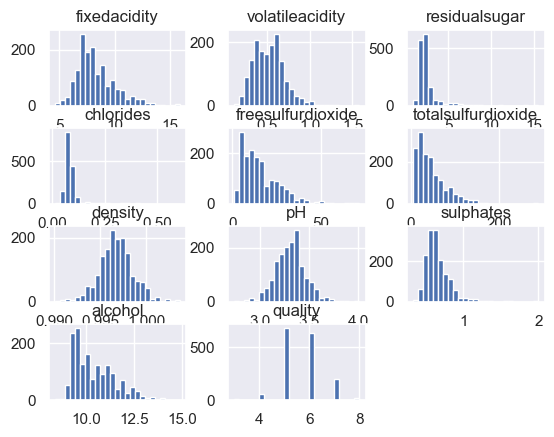

In [178]:
hist = df.hist(bins=25)

Nearly all the features appear to be normally distributed except free sulfur dioxide, total sulfur dioxide, and alcohol. Let's normalize them.

Also the residual sugar, chlorides, and sulphates have a long positive tail, so we will "cut off the tail" by removing those few extreme values.
* Residual sugar: mean = 2.53, the 75th percentile of values is 2.6, yet the max is 15.5.  I will discard values above 5.
* Chlorides: mean = 0.087, the 75th percentile of values is 0.09, yet the max is 0.61.  I will discard values above 0.2.
* Sulphates: mean = 0.6581, the 75th percentile of values is 0.73, yet the max is 2.00.  I will discard values above 1.3.  

Let's first see how many total rows we will be deleting, delete them, then confirm we've deleted them.

84 samples exceed residual sugar threshold of 5 to be deleted
41 samples exceed chlorides threshold of 0.25 to be deleted
14 samples exceed sulphates threshold of 1.3 to be deleted
0 samples remaining exceeding residual sugar threshold of 5
0 samples remaining exceeding chlorides threshold of 0.2
0 samples remaining exceeding sulphates threshold of 1.3


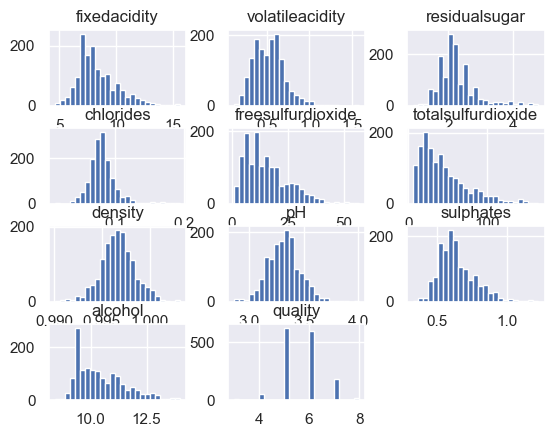

In [179]:
print (df.residualsugar[df.residualsugar > 5].count(), "samples exceed residual sugar threshold of 5 to be deleted")
print (df.chlorides[df.chlorides > 0.2].count(), "samples exceed chlorides threshold of 0.25 to be deleted")
print (df.sulphates[df.sulphates > 1.3].count(), "samples exceed sulphates threshold of 1.3 to be deleted")

df = df[df['residualsugar'] < 5]
df = df[df['chlorides'] < 0.2]
df = df[df['sulphates'] < 1.3]
print (df.residualsugar[df.residualsugar > 5].count(), "samples remaining exceeding residual sugar threshold of 5")
print (df.chlorides[df.chlorides > 0.2].count(), "samples remaining exceeding chlorides threshold of 0.2")
print (df.sulphates[df.sulphates > 1.3].count(), "samples remaining exceeding sulphates threshold of 1.3")
hist = df.hist(bins=25)

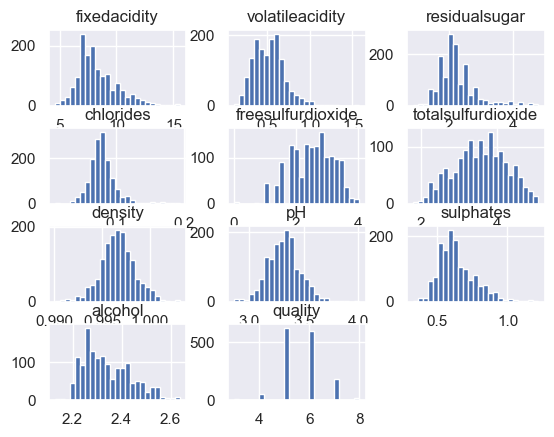

In [180]:
import numpy as np

#df = pd.read_csv('wine-quality/winequality-red.csv', delimiter=';')
#df.columns = df.columns.str.replace(' ', '')
#df.drop(columns='citricacid', inplace=True)

non_normal_features = ['freesulfurdioxide', 'totalsulfurdioxide', 'alcohol']
for feature in non_normal_features:
    df[feature] = np.log(df[feature])

df.describe(include='all') 
    
hist = df.hist(bins=25)

Let's look at the stats for each feature including count, mean, std, min, and max to see if any anomalies appear, such as unexpected negative values or extreme outliers.

As mentioned above, the min/max values of the features vary (i.e. the max fixed acidity is 15.9 while the max citric acid is 1.0), so the code below scales the data values so that future prediction models don't incorrectly weight some features over others.

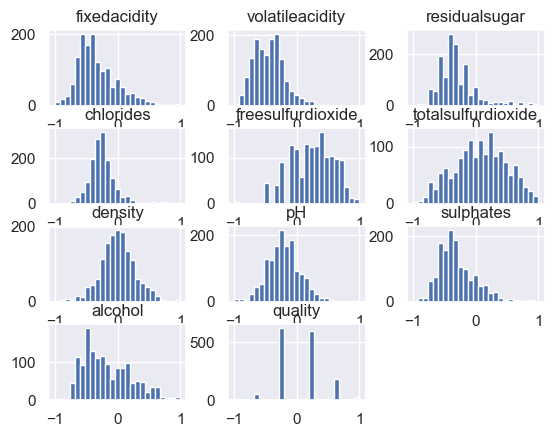

In [181]:
from sklearn import preprocessing
x = df.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
hist = df.hist(bins=25)

Now that the data has been normalized and scaled, check for undefined values.

In [182]:
for c in df.columns[:]:
    print(c, df[c].isna().sum())

fixedacidity 0
volatileacidity 0
residualsugar 0
chlorides 0
freesulfurdioxide 0
totalsulfurdioxide 0
density 0
pH 0
sulphates 0
alcohol 0
quality 0


No undefined data was found in this data set.

### Conclusion of data cleaning
This is a relatively clean set of data.  We have modified the column headers to remove spaces (ex: changed "citric acid" to "citric-acid"), then we have made the following observations:
* We confirmed that the data type used for each column matches the expected data type
* We reviewed the min and max values of each column and confirmed they match our physical expectations (ex: pH levels fall within the physical limits of pH values).
* We removed citric acid since it is redundant --> it affects acidity, which is already measured via pH.
* When reviewing the min and max values, we looked for differences in the scales of features.  For example, density has a mean of 0.99 while alcohol has a mean of 10.42.  This suggests that data scaling was be needed, so the MinMaxScaler normalization was performed.
* We briefly reviewed the unique values for each column to look for anomalies such as negative values for measurements that should only ever be positive such as 'alcohol', and did not see any issues
* We looked for undefined values and found 0 of them
* We looked at a histogram to see if the features were normally distributed and found 3 that were not - free sulfur dioxide, total sulfur dioxide, and alcohol.  We applied the log function to these three to normalize them.

The winequality.names file warns that some features may not be relevant, so we should keep a look out for that moving forward.

--- 
# 5. Exploratory Data Analysis (EDA)
Cleaning of data was completed above.  In this section part 2 we will perform an exploratory data analysis to look for the features that best predict the output (quality), see how all features are related to each other using a pair plot, construct a linear model to look for significant interactions, then clean the data to remove any troublesome interactions if they exist.

Plotting a correlation matrix will display how the various features are related to each other, and how they are related to the quality.  A heatmap will display this informational visually, making it easier to spot correlated data.

In [183]:
df.corr()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.261770,0.257106,0.209096,-0.174338,-0.112208,0.693362,-0.709235,0.213059,-0.075080,0.110401
volatileacidity,-0.261770,1.000000,0.046789,0.118208,0.006531,0.067179,0.009774,0.244751,-0.329842,-0.188458,-0.394963
residualsugar,0.257106,0.046789,1.000000,0.208063,0.027283,0.088201,0.383901,-0.118686,0.056598,0.108647,-0.006432
chlorides,0.209096,0.118208,0.208063,1.000000,-0.046515,0.066990,0.361380,-0.200532,0.045051,-0.241121,-0.176972
freesulfurdioxide,-0.174338,0.006531,0.027283,-0.046515,1.000000,0.779812,-0.063687,0.117330,0.033322,-0.063721,-0.036961
totalsulfurdioxide,-0.112208,0.067179,0.088201,0.066990,0.779812,1.000000,0.094760,0.020891,-0.000840,-0.233339,-0.162557
density,0.693362,0.009774,0.383901,0.361380,-0.063687,0.094760,1.000000,-0.355754,0.149971,-0.503001,-0.195800
pH,-0.709235,0.244751,-0.118686,-0.200532,0.117330,0.020891,-0.355754,1.000000,-0.053462,0.199040,-0.062066
sulphates,0.213059,-0.329842,0.056598,0.045051,0.033322,-0.000840,0.149971,-0.053462,1.000000,0.212041,0.367836
alcohol,-0.075080,-0.188458,0.108647,-0.241121,-0.063721,-0.233339,-0.503001,0.199040,0.212041,1.000000,0.483050


<Axes: >

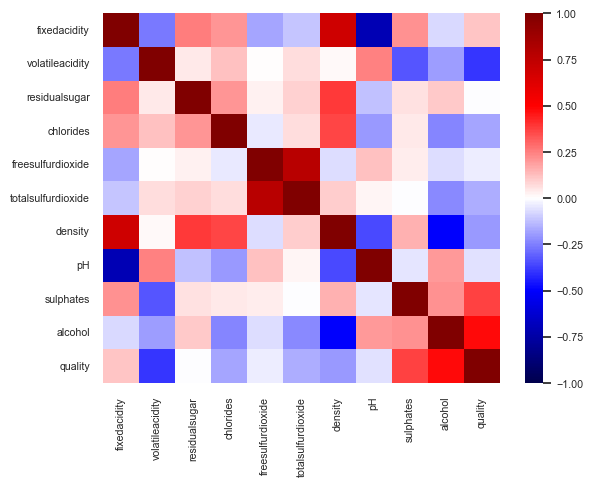

In [184]:
import seaborn as sns
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic')

The heatmap shows that the following 2 features are most closely correlated with quality:
1. alcohol
2. sulphates

However these features are not strongly correlated with quality, so we'll need to dig in further.  The heatmap also shows that 'volatile-acidity' is most negatively correlated with quality.

A pair plot shows correlation between variables.  If two variables are positively correlated, a general upward trend will be observed in the corresponding scatterplot.  Conversely if two variables are negatively correlated, a general downward trend will be observed.  

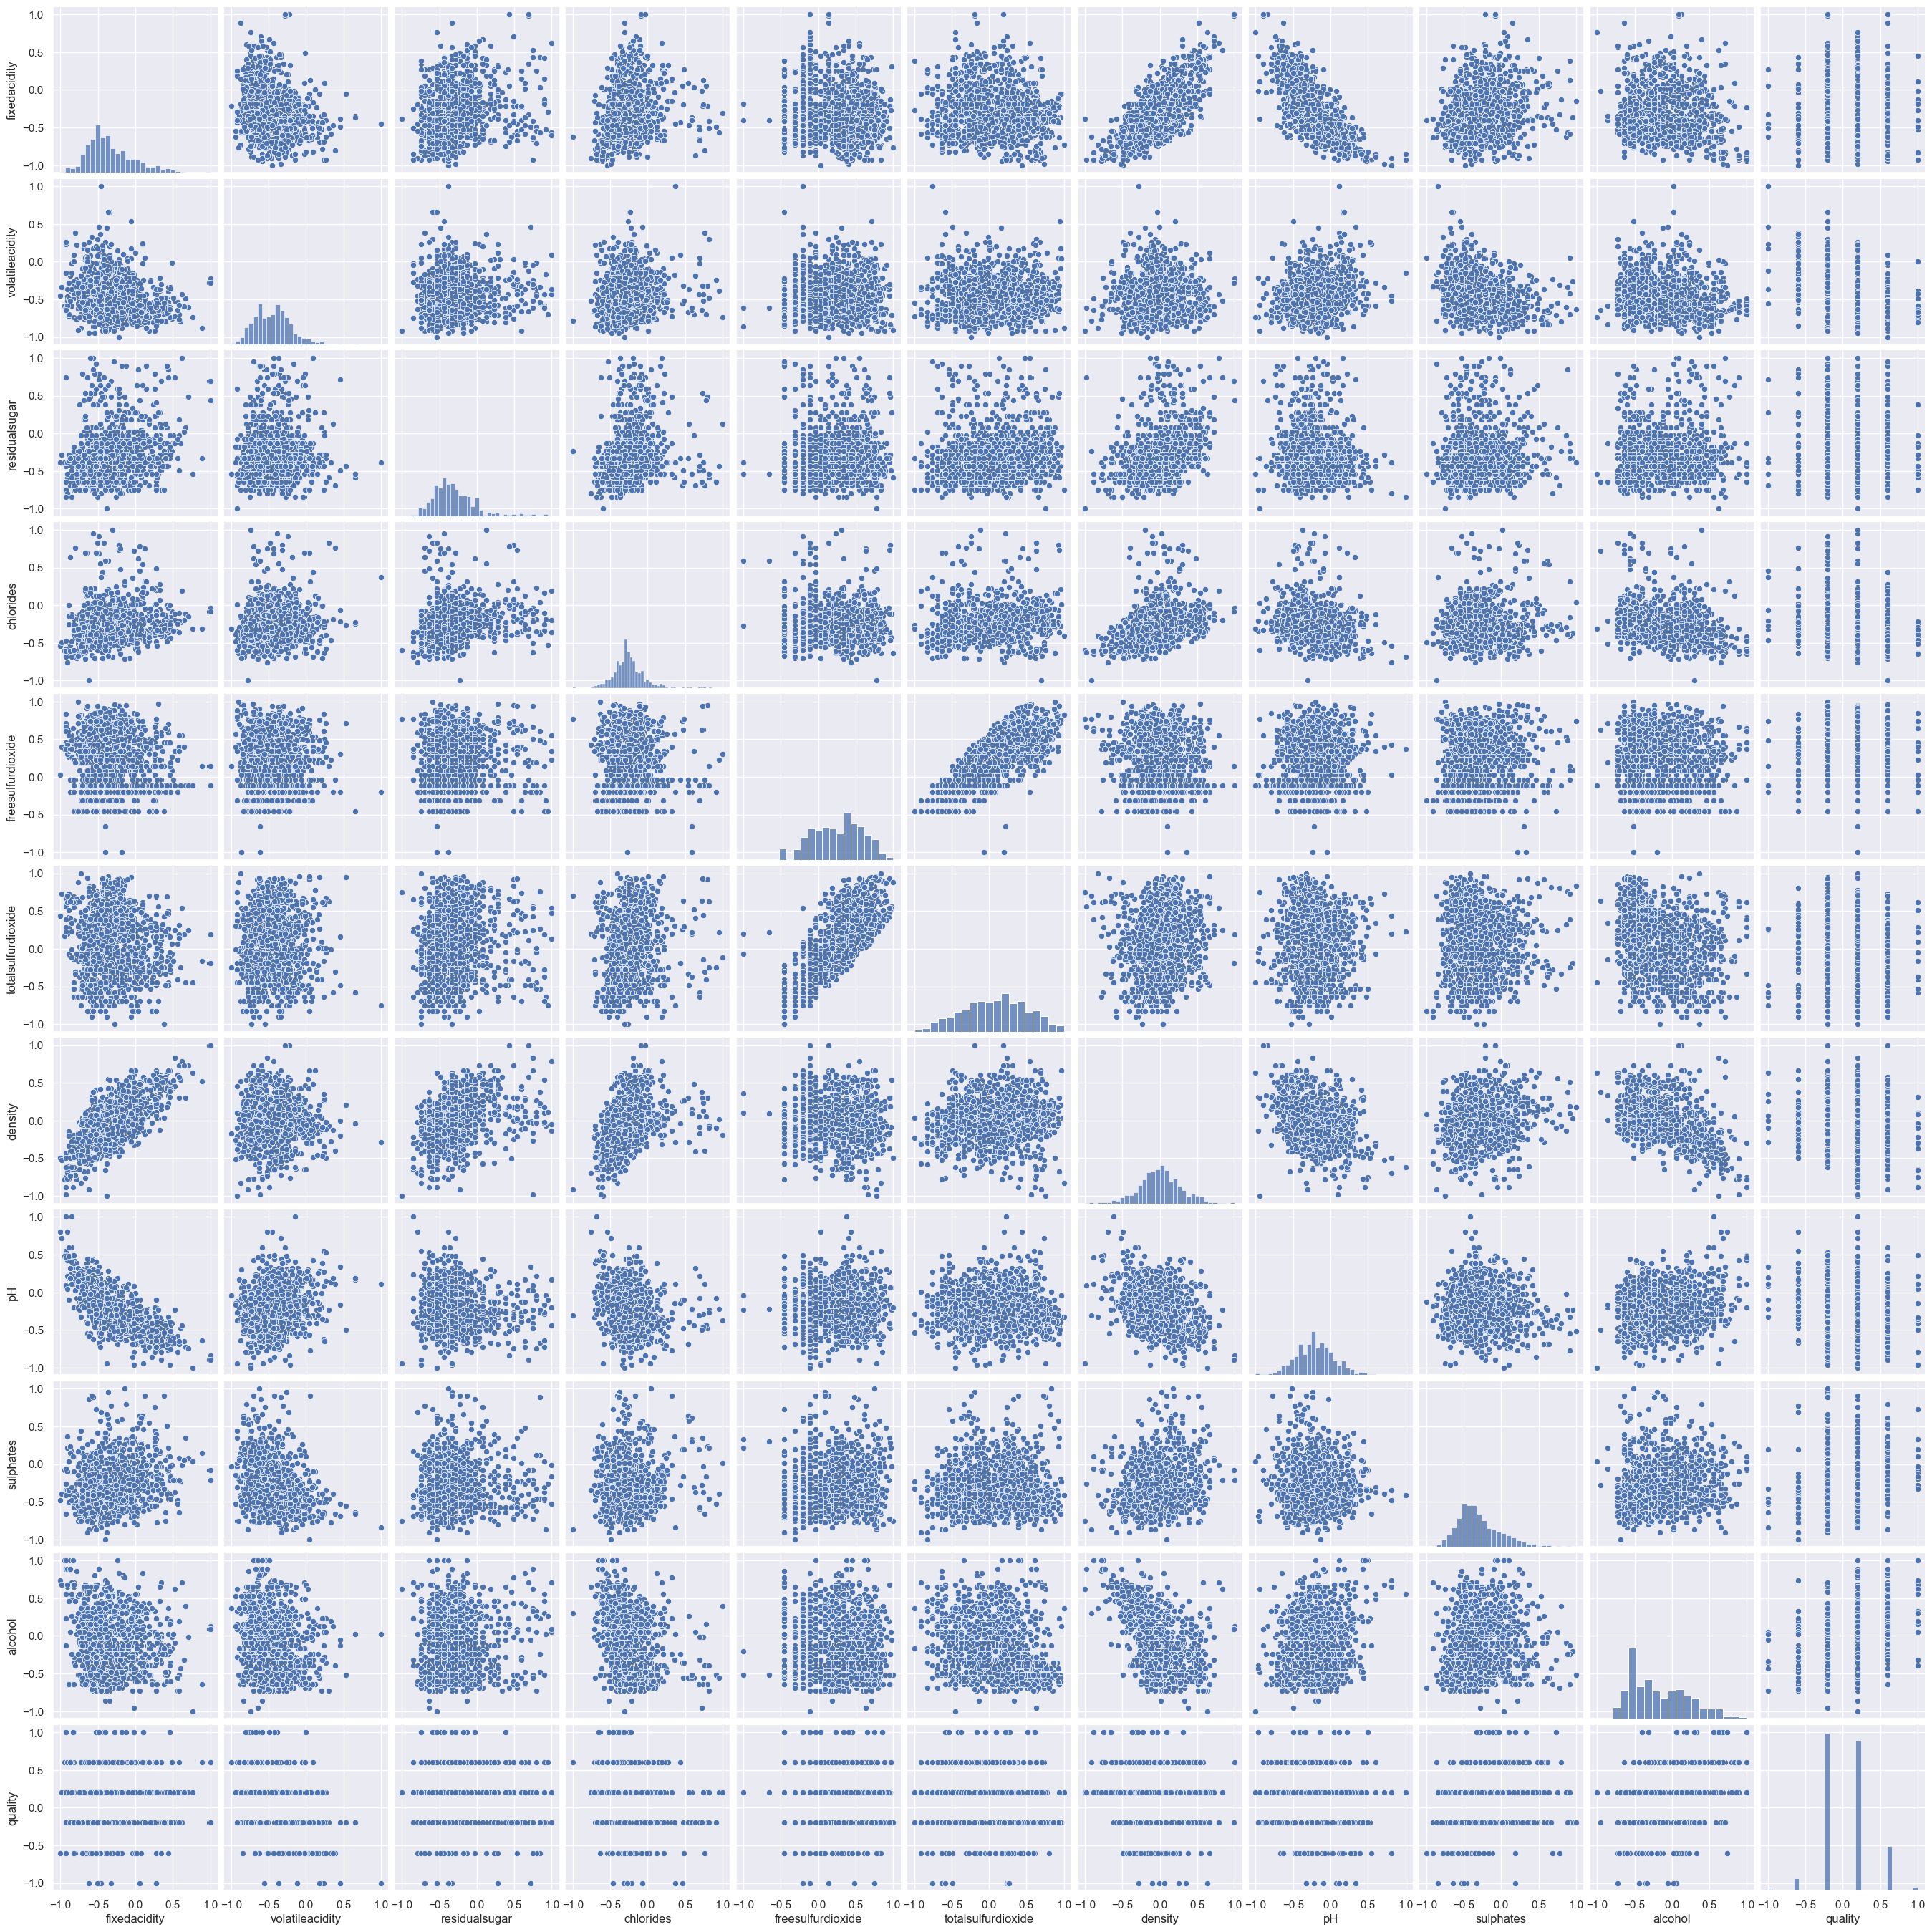

In [185]:
sns.set(font_scale=1)
sns.pairplot(df)

The pair plot above shows a few variables that appear to be linearly correlated with one another, which may be an indication that we can drop those variables to reduce the complexity of the model.  For example, the following features are  correlated with each other.
* Fixed acidity vs. density - positive correlation
* Free sulphur dioxide vs. total sulphur dioxide - positive correlation
* Fixed density vs. pH - negative correlation

Next let's use linear regression to dig into the 2 most closely correlated features to see how well they can individually be used to predict quality.  Split the data such that 80% is used for training and the remaining 20% is used for testing.

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2)
print(len(X_train), len(X_test))

1175 294


In [187]:
import statsmodels.formula.api as smf

best_guess_predictor = 'alcohol'
model = smf.ols(formula='quality ~ ' + best_guess_predictor, data=X_train).fit()
adj_R2 = model.rsquared
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     369.9
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           7.23e-72
Time:                        17:03:23   Log-Likelihood:                -163.01
No. Observations:                1175   AIC:                             330.0
Df Residuals:                    1173   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1235      0.009     14.051      0.0

'Alcohol' was most closely correlated with 'quality' according to the heatmap, but the r-squared value for 'alcohol' was a measly 0.240.  Let's look at the r-squared values of the next best predictor, which is 'sulphates'.

In [188]:
best_guess_predictor = 'sulphates'
model = smf.ols(formula='quality ~ ' + best_guess_predictor, data=X_train).fit()
adj_R2 = model.rsquared
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     193.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           8.33e-41
Time:                        17:03:23   Log-Likelihood:                -234.39
No. Observations:                1175   AIC:                             472.8
Df Residuals:                    1173   BIC:                             482.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1731      0.012     14.525      0.0

The r-squared values for sulphates was even worse than alcohol, as expected.  
* R-squared of sulphates was 0.142

This indicates that single variable linear regression will not yield a useful predictor.  A different model may be needed.  

### Conclusion for exploratory data analysis (EDA)

Using a correlation matrix and a heatmap we determined that alcohol is the feature that most closely predicts the quality, but it does so poorly (very low r-squared value of 0.240).  The 2nd feature that most closely predicts quality does so poorly (sulphates r-squared = 0.142).  

We then used a scatter plot to see how the features were related to each other and observed that the following 3 pairs of features are correlated with each other, suggesting that we may be able to drop feature from each pair to simplify the model without losing useful info.  This makes intuitive sense for #2 below (i.e. the free sulphur dioxide is expected to be closely correlated with the total sulphur dioxide).
1. Fixed acidity vs. density - positive correlation
2. Free sulphur dioxide vs. total sulphur dioxide - positive correlation
3. Fixed density vs. pH - negative correlation

The very low r-squared values from simple linear regression suggest that a more complex model may be needed to accurately predict quality.


---
# 6. Models

In this section we will explore various models.  Each new model we look at will have it's own sub-header to make navigation easy.  

### Polynomial regression
To start with we will programmatically determine the best predictor, which should confirm what we observed in the heatmap above (so we expect to see 'alcohol' as the top predictor).  

In [189]:
import statsmodels.api as sm

features = list(df.columns)
features.remove('quality')

best_predictor = None
best_r_squared = -1
Y = df['quality']

for feature in features:
    X = df[feature]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    r_squared = result.rsquared
    
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_predictor = feature

print (best_predictor)
print (best_r_squared)

alcohol
0.23333698207724674


We confirmed that 'alcohol' is indeed the top predictor of quality, which matches our observation from the heatmap in part 1.  Now we will fit a polynomial regression up to N=10 and print out the degree that delivers the best result.

best degree: 9, best r squared: 0.24687455149078597


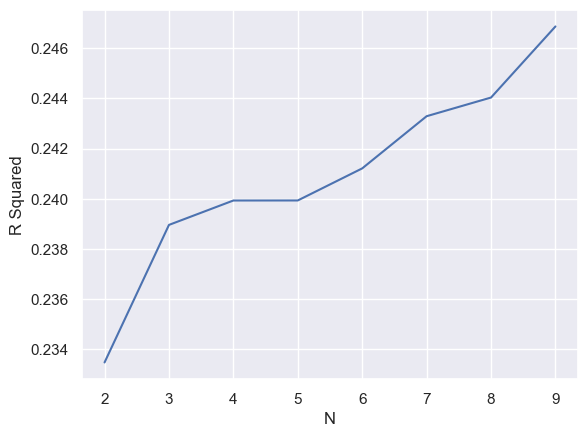

In [190]:
import matplotlib.pyplot as plt

model = 'quality ~ ' + best_predictor
model_so_far = smf.ols(formula = model, data = df)
model_so_far = model_so_far.fit()
best_r_squared = model_so_far.rsquared
best_degree = 1
X_alcohol = []
y_alcohol = []

for i in range(2, 10):
    model += " + I(" + best_predictor + "**" + str(i) + ")"
    model_so_far = smf.ols(formula = model, data = df).fit()
    X_alcohol.append(i)
    y_alcohol.append(model_so_far.rsquared)
    if best_r_squared < model_so_far.rsquared:
        best_r_squared = model_so_far.rsquared
        best_degree = i
        
print ("best degree: " + str(best_degree) + ", best r squared: " + str(best_r_squared))
plt.xlabel("N")
plt.ylabel("R Squared")
plt.plot(X_alcohol, y_alcohol)

Next we'll create a new feature called 'alcoholnorm' that stores the normalized alcohol values.  We'll then iterate from N=2 to 20 and print out the r-squared values at each step.  At the end we will compute the 'sound degree', which balances the desirable increase in r-squared with the growing complexity associated with increasing N values.

r squared at N=1: 0.23333698207724674
sound degree: 9


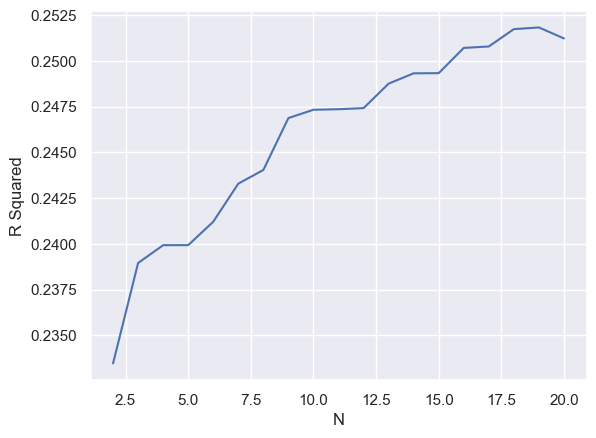

In [191]:
import matplotlib.pyplot as plt
df_norm = df.copy()
df_norm['alcoholnorm'] = df_norm['alcohol']/df_norm['alcohol'].mean()
model = 'quality ~ alcoholnorm'
model_so_far = smf.ols(formula = model, data = df_norm)
model_so_far = model_so_far.fit()
best_r_squared = model_so_far.rsquared
print ("r squared at N=1: " + str(model_so_far.rsquared))
best_degree = 0
sound_degree = 0
X_alcohol_norm = []
y_alcohol_norm = []

for i in range(2, 21):
    model += " + I(alcoholnorm**" + str(i) + ")"
    model_so_far = smf.ols(formula = model, data = df_norm).fit()
    X_alcohol_norm.append(i)
    y_alcohol_norm.append(model_so_far.rsquared)
    #print ("r squared at N=" + str(i) + ": " + str(model_so_far.rsquared))
    if (round(best_r_squared, 2) < round(model_so_far.rsquared, 2)): #round to ignore trivial improvements
        sound_degree = i
    
    if (best_r_squared < model_so_far.rsquared):
        best_r_squared = model_so_far.rsquared
        best_degree = i

print ("sound degree: " + str(sound_degree))
plt.xlabel("N")
plt.ylabel("R Squared")
plt.plot(X_alcohol_norm, y_alcohol_norm)

A polynomial model with N=7 provides the best balance between accuracy and complexity, although the r-squared values are still very low (0.234 at N=7), indicating this model is not a great fit.  The increased accuracy after that point are very small and may not be worth the additional complexity.

### Multi-linear regression
Below we construct a multi-linear model without interactions.

In [192]:
model = smf.ols(formula='quality ~ fixedacidity + volatileacidity + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     90.08
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.25e-144
Time:                        17:03:24   Log-Likelihood:                -49.161
No. Observations:                1469   AIC:                             120.3
Df Residuals:                    1458   BIC:                             178.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0044      0.034     -0.129      0.898      -0.072       0.063
fixedacidity           0.0200      0.055      0.361      0.718      -0.089       0.129
volatileacidity       -0.2699      0.030     -8.871      0.000      -0.330      -0.210
residualsugar         -0.0276      0.026     -1.046      0.296      -0.079       0.024
chlorides             -0.0963      0.033     -2.921      0.004      -0.161      -0.032
freesulfurdioxide      0.0670      0.033      2.044      0.041       0.003       0.131
totalsulfurdioxide    -0.0792      0.027     -2.923      0.004      -0.132      -0.026
density               -0.0496      0.061     -0.807      0.420      -0.170       0.071
pH                    -0.1146      0.045     -2.567      0.010      -0.202      -0.027
sulphates              0.2318      0.025      9.404      0.000       0.183       0.280
alcohol                0.3008      0.031      9.787      0.000       0.240       0.361
==============================================================================
Omnibus:                       17.476   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.058
Skew:                          -0.098   Prob(JB):                     2.20e-06
Kurtosis:                       3.622   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The multi-linear model has an r-squared value of 0.361, exceeding the r-squared value we got with polynomial regression above (0.234), but the value is still quite low.  

By reviewing the output above to look for rows with low p values (less than 0.05) and relatively high correlation values, the following features stand out:

Feature name: p value, coefficient
1. volatile acidity: 0.000, -1.0836
2. chlorides: 0.000, -1.8742
3. pH: 0.031, -0.4137
4. sulphates: 0.000, 0.9163
5. alcohol: 0.000, 0.2762

The features below will be dropped.  They either have a p value above our threshold of 0.05, or they have a very low coefficient, so we can omit them from the model and re-run it.  
1. fixed acidity: 0.336, 0.0250
2. residual sugar: 0.276, 0.0163
3. free sulfur dioxide: 0.045, 0.0044
4. total sulfur dioxide: 0.000, -0.0033
5. density: 0.409, -17.8812

In [193]:
model = smf.ols(formula='quality ~ volatileacidity + chlorides + pH + sulphates + alcohol', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.05e-146
Time:                        17:03:24   Log-Likelihood:                -56.836
No. Observations:                1469   AIC:                             125.7
Df Residuals:                    1463   BIC:                             157.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0015      0.019     -0.078      0.938      -0.038       0.035
volatileacidity    -0.2817      0.030     -9.373      0.000      -0.341      -0.223
chlorides          -0.1217      0.032     -3.825      0.000      -0.184      -0.059
pH                 -0.1119      0.027     -4.135      0.000      -0.165      -0.059
sulphates           0.2208      0.023      9.422      0.000       0.175       0.267
alcohol             0.3280      0.019     17.594      0.000       0.291       0.365
==============================================================================
Omnibus:                       14.055   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.411
Skew:                          -0.070   Prob(JB):                     3.70e-05
Kurtosis:                       3.560   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The multi-linear regression model above has an r-squared value of 0.348, which is still significantly higher than what we achieved with simple linear regression (0.234) but it is not significantly better than what we achieved with the multi-linear regression model with all 11 features (r-squared = 0.361).  

### Forward stepwise refinement
This next lengthy section will perform forward stepwise refinement to find the feature that is most closely correlated with quality, which we already know to be alcohol, then to add 4 more features for a total of 5 features to generate the multi-linear model that achieves the best r-squared at each step.

In [194]:
best = ['',0]
features = list(df.columns)
features.remove('quality')
for p in features:
    model  = smf.ols(formula='quality~'+p, data=X_train).fit()
    #print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
train1 = smf.ols(formula='quality~' + best[0], data=X_train).fit()

if (features.count(best[0]) > 0):
    features.remove(best[0])
k2_best = ['',0]
for p in features:
    test_formula = 'quality~' + best[0] + ' + ' + p
    model  = smf.ols(formula=test_formula, data=X_train).fit()
    #print(p, model.rsquared)
    if model.rsquared>k2_best[1]:
        k2_best = [p, model.rsquared]
        best_formula = test_formula
print('best:',k2_best)
print('formula: ',best_formula)
train2 = smf.ols(formula=test_formula, data=X_train).fit()

if (features.count(k2_best[0]) > 0):
    features.remove(k2_best[0])
k3_best = ['',0]
for p in features:
    test_formula = 'quality~' + best[0] + ' + ' + k2_best[0] + ' + ' + p
    model  = smf.ols(formula=test_formula, data=X_train).fit()
    #print(p, model.rsquared)
    if model.rsquared>k3_best[1]:
        k3_best = [p, model.rsquared]
        best_formula = test_formula
print('best:',k3_best)
print('formula: ',best_formula)
train3 = smf.ols(formula=test_formula, data=X_train).fit()

if (features.count(k3_best[0]) > 0):
    features.remove(k3_best[0])
k4_best = ['',0]
for p in features:
    test_formula = 'quality~' + best[0] + ' + ' + k2_best[0] + ' + ' + k3_best[0] + ' + '+ p
    model  = smf.ols(formula=test_formula, data=X_train).fit()
    #print(p, model.rsquared)
    if model.rsquared>k4_best[1]:
        k4_best = [p, model.rsquared]
        best_formula = test_formula
print('best:',k4_best)
print('formula: ',best_formula)
train4 = smf.ols(formula=test_formula, data=X_train).fit()

if (features.count(k4_best[0]) > 0):
    features.remove(k4_best[0])
k5_best = ['',0]
for p in features:
    test_formula = 'quality~' + best[0] + ' + ' + k2_best[0] + ' + ' + k3_best[0] + ' + ' + k4_best[0] + ' + ' + p
    model  = smf.ols(formula=test_formula, data=X_train).fit()
    #print(p, model.rsquared)
    if model.rsquared>k5_best[1]:
        k5_best = [p, model.rsquared]
        best_formula = test_formula
print('best:',k5_best)
print('formula: ',best_formula)
train5 = smf.ols(formula=test_formula, data=X_train).fit()

best: ['alcohol', 0.2397439914197934]
best: ['volatileacidity', 0.3398975579393394]
formula:  quality~alcohol + volatileacidity
best: ['sulphates', 0.37665826034219874]
formula:  quality~alcohol + volatileacidity + sulphates
best: ['pH', 0.3817637503989717]
formula:  quality~alcohol + volatileacidity + sulphates + pH
best: ['chlorides', 0.3871239091142864]
formula:  quality~alcohol + volatileacidity + sulphates + pH + chlorides


Adj R2 train:  [0.23909586183021103, 0.31792896282912386, 0.37506131310140156, 0.37965012219520755, 0.38214573045806055]
Adj R2 test:  [0.03127538862678558, 0.0664591874000583, 0.0841732026219677, 0.10436988119725943, 0.16273878850686763]


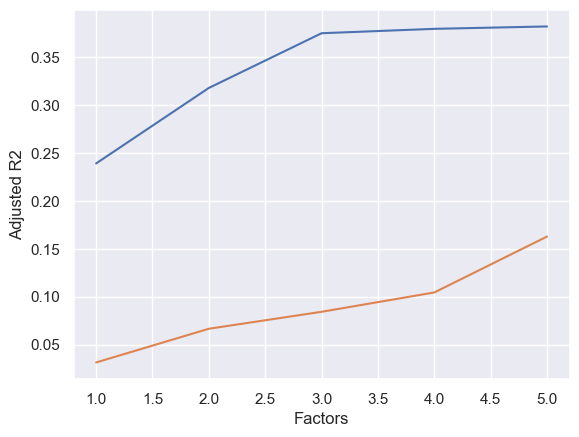

In [195]:
import matplotlib.pyplot as plt

# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# your code here
adjr2_train = [train1.rsquared_adj, train2.rsquared_adj, train3.rsquared_adj, train4.rsquared_adj, train5.rsquared_adj]

#now run through k=1 through 5 for the test data
test_best = ['',0]
for p in features:
    model  = smf.ols(formula='quality~'+p, data=X_test).fit()
    if model.rsquared>test_best[1]:
        test_best = [p, model.rsquared]

if (features.count(test_best[0]) > 0):
    features.remove(test_best[0])
test_k2_best = ['',0]
for p in features:
    test_formula = 'quality~' + test_best[0] + ' + ' + p
    model  = smf.ols(formula=test_formula, data=X_test).fit()
    if model.rsquared_adj>test_k2_best[1]:
        test_k2_best = [p, model.rsquared_adj]

if (features.count(test_k2_best[0]) > 0):
    features.remove(test_k2_best[0])
test_k3_best = ['',0]
for p in features:
    test_formula = 'quality~' + test_best[0] + ' + ' + test_k2_best[0] + ' + ' + p
    model  = smf.ols(formula=test_formula, data=X_test).fit()
    if model.rsquared_adj>test_k3_best[1]:
        test_k3_best = [p, model.rsquared_adj]

if (features.count(test_k3_best[0]) > 0):
    features.remove(test_k3_best[0])
test_k4_best = ['',0]
for p in features:
    test_formula = 'quality~' + test_best[0] + ' + ' + test_k2_best[0] + ' + ' + test_k3_best[0] + ' + '+ p
    model  = smf.ols(formula=test_formula, data=X_test).fit()
    if model.rsquared_adj>test_k4_best[1]:
        test_k4_best = [p, model.rsquared_adj]

if (features.count(test_k4_best[0]) > 0):
    features.remove(test_k4_best[0])
test_k5_best = ['',0]
for p in features:
    test_formula = 'quality~' + test_best[0] + ' + ' + test_k2_best[0] + ' + ' + test_k3_best[0] + ' + ' + test_k4_best[0] + ' + ' + p
    model = smf.ols(formula=test_formula, data=X_test).fit()
    if model.rsquared>test_k5_best[1]:
        test_k5_best = [p, model.rsquared]

adjr2_test = [test_best[1], test_k2_best[1], test_k3_best[1], test_k4_best[1], test_k5_best[1]]

print ("Adj R2 train: ", adjr2_train)
print ("Adj R2 test: ", adjr2_test)
plt.xlabel("Factors")
plt.ylabel("Adjusted R2")
plt.plot([1,2,3,4,5],adjr2_train)
plt.plot([1,2,3,4,5],adjr2_test)

Forward stepwise refinement resulted in an adjusted r-squared value of 0.163 on the test data

### Logistic regression

Logistic regression is not applicable for this data set since it uses continuous variables and not categorical variables.

### K-Nearest Neighbors (KNN)

The first test will use a KNN model looking at the 3 nearest neighbors.


In [200]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
y = df['quality'].values
X = df.drop('quality', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neigh.fit(X_train, y_train)
print(neigh.predict(X_test))
print(neigh.score(X_test, y_test))

[ 0.33333333 -0.06666667 -0.2        -0.2         0.46666667  0.2
 -0.2         0.2         0.06666667 -0.2        -0.2        -0.06666667
 -0.73333333  0.6         0.06666667  0.06666667  0.06666667  0.2
 -0.06666667  0.2        -0.2        -0.06666667  0.06666667 -0.2
  0.46666667  0.6        -0.2        -0.2         0.33333333  0.06666667
 -0.2        -0.2        -0.2         0.06666667 -0.06666667 -0.2
 -0.06666667 -0.2        -0.06666667 -0.06666667  0.06666667  0.33333333
  0.06666667  0.6        -0.2        -0.06666667  0.2         0.33333333
  0.2         0.06666667  0.46666667  0.06666667 -0.2         0.46666667
  0.33333333  0.06666667  0.2         0.06666667 -0.2        -0.2
  0.2         0.33333333  0.6         0.2        -0.06666667 -0.06666667
  0.06666667  0.06666667  0.33333333  0.46666667 -0.06666667 -0.33333333
  0.2        -0.2         0.2         0.06666667 -0.06666667 -0.2
  0.33333333  0.46666667  0.2         0.46666667 -0.06666667 -0.06666667
 -0.06666667  0.2   

I'll now expand the analysis to look at various values for N from 1 to 30, and plot the accuracy of each iteration.

i =  1 , score: 0.10151106415891642
i =  2 , score: 0.15558678714935192
i =  3 , score: 0.2383180214680526
i =  4 , score: 0.22526127638702864
i =  5 , score: 0.26368277085023295
i =  6 , score: 0.2762172461280159
i =  7 , score: 0.2880454262483729
i =  8 , score: 0.2919026721877417
i =  9 , score: 0.293027110001586
i =  10 , score: 0.3012307344035918
i =  11 , score: 0.29920429853717345
i =  12 , score: 0.3021381589289869
i =  13 , score: 0.2934630615924213
i =  14 , score: 0.29223339432926476
i =  15 , score: 0.29469234784030385
i =  16 , score: 0.2886745941726876
i =  17 , score: 0.28670518246526133
i =  18 , score: 0.2834923908798157
i =  19 , score: 0.28719447578258417
i =  20 , score: 0.2934660152049652
i =  21 , score: 0.2971256453306671
i =  22 , score: 0.29301635820768934
i =  23 , score: 0.29668796478224024
i =  24 , score: 0.2934625488124658
i =  25 , score: 0.29183098719085443
i =  26 , score: 0.2936845825332105
i =  27 , score: 0.3020045435253753
i =  28 , score: 0.3082707

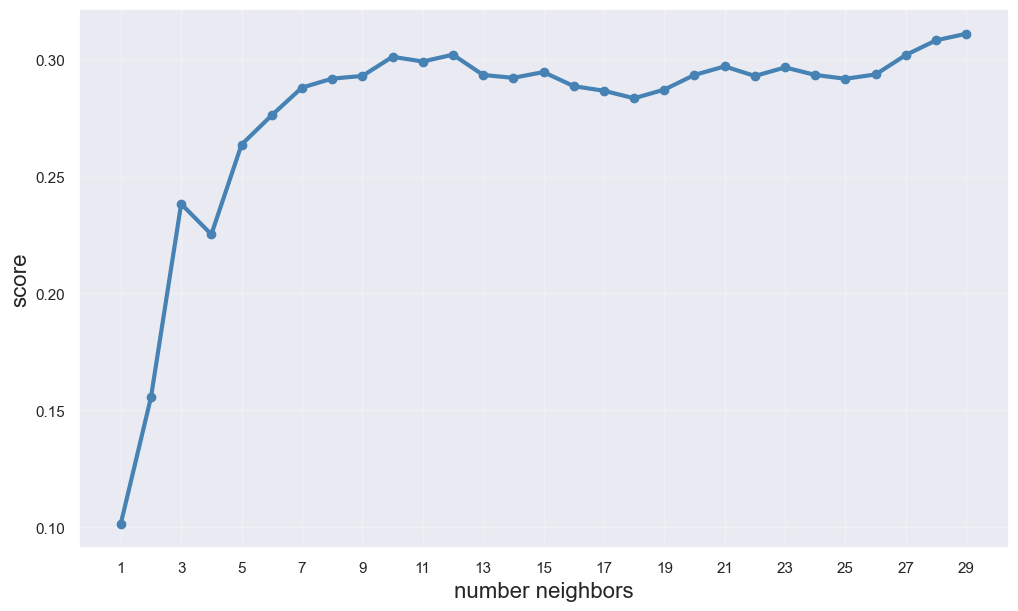

In [203]:
scores = []
wacc = []
allks = range(1,30)

from sklearn.metrics import accuracy_score
for i in allks:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
    print ("i = ", i, ", score:", score)


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("score", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)

The model shows a generally increasing trend as the N value increases.  At N=8 the accuracy reaches a high value of around 0.2919, then hovers around that same value as N increases, which makes N=8 the sound value.

### Decision Tree 
Now we'll build a decision tree model starting with no limits on the max depth or the max leaf nodes.

In [210]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=None, max_leaf_nodes=None).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print ("Score = ", score, ", Depth = ", clf.get_depth())

for i in range(3, 10):
    clf = DecisionTreeRegressor(max_depth=i, max_leaf_nodes=None).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print ("Score = ", score, ", Depth = ", clf.get_depth())

for i in range(2,10):
    clf = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=i).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print ("Score = ", score, ", Depth = ", clf.get_depth())
    
clf = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=None).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print ("Score = ", score, ", Depth = ", clf.get_depth())

Score =  -0.14806919579694 , Depth =  21
Score =  0.23992953018671626 , Depth =  3
Score =  0.23873256271117094 , Depth =  4
Score =  0.19581014150713916 , Depth =  5
Score =  0.15290845574617484 , Depth =  6
Score =  0.14583058305322083 , Depth =  7
Score =  0.07324213583762829 , Depth =  8
Score =  0.062372267197040476 , Depth =  9
Score =  0.13475242368389984 , Depth =  1
Score =  0.16302482381277028 , Depth =  2
Score =  0.19004447342127861 , Depth =  3
Score =  0.2303254875853349 , Depth =  3
Score =  0.25161302229694393 , Depth =  3
Score =  0.2383266444350456 , Depth =  3
Score =  0.2502562128418091 , Depth =  4
Score =  0.25699062024914676 , Depth =  4
Score =  0.25845248448546065 , Depth =  4


After running various values of max depth and max leaf nodes, the maximum score of 0.2584 is achieved with a max depth of 4 and max leaf nodes set to none.

### Support Vector Machine (SVM)
We can use a support vector machine along with a grid search to look for the optimal hyperparameters.  In the code below we look at C values from 1 to 10 along with two different kernel options - linear and rbf.  

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVR()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print ("Score: ", clf.score(X_test, y_test))
print ("Best params: ", clf.best_params_)
print ("Best score: ", clf.best_score_)

Score:  0.3743955291675114
Best params:  {'C': 1, 'kernel': 'rbf'}
Best score:  0.38763826975065135


After considering both the linear and rbf kernels along with C values from 1 to 10, the best parameters were found to be the rbf kernel with C=1, which achieved a score of 0.3876.  Now we can create a model using those ideal parameters to view the score and confirm the findings.  The code below is simply confirming what we've already learned just above.

In [213]:
svc = svm.SVR(kernel='rbf', C=1)
svc.fit(X_train, y_train)
print ("Score: ", clf.score(X_test, y_test))

Score:  0.3743955291675114


### AdaBoost
For our 2nd to last model, we will look at an ensemble method; AdaBoost 

In [215]:
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print ("AdaBoost classifier score: ", clf.score(X_test, y_test))

AdaBoost classifier score:  0.33409593734591536


### Random Forest
The final model we'll consider is the random forest model.  A for loop below iterates over max depth values from 1 to 20 and prints the score for each iteration.

In [216]:
from sklearn.ensemble import RandomForestRegressor

for i in range(20):
    clf = RandomForestRegressor(max_depth=i+1, random_state=0)
    clf.fit(X_train, y_train)
    print ("Random forest classifier score for max depth ", i+1, ": ", clf.score(X_test, y_test))

Random forest classifier score for max depth  1 :  0.18378242896841956
Random forest classifier score for max depth  2 :  0.286027835613464
Random forest classifier score for max depth  3 :  0.30925333385978904
Random forest classifier score for max depth  4 :  0.3172563909816145
Random forest classifier score for max depth  5 :  0.3258535861167343
Random forest classifier score for max depth  6 :  0.3360676023894771
Random forest classifier score for max depth  7 :  0.34686213011731104
Random forest classifier score for max depth  8 :  0.35065248059195553
Random forest classifier score for max depth  9 :  0.35953310220372403
Random forest classifier score for max depth  10 :  0.3616797454776254
Random forest classifier score for max depth  11 :  0.371276913519868
Random forest classifier score for max depth  12 :  0.3671441943526378
Random forest classifier score for max depth  13 :  0.3674186330336865
Random forest classifier score for max depth  14 :  0.36652091144950316
Random fore

The random forest classifier performs significantly better than our other classifiers so far with a score of 0.37 when created with a max depth of 11.  Increasing the max depth past 11 yielded roughly the same performance.  

---
# 7. Results and Analysis
To summarize this analysis and the results, we started with a data analysis that involved some minor cleaning (modifying the column headers) review of min, max, and average values, data normalization, and review of data types.  

Then the data set for the quality of red wine was split into a training data set and a test data set.  Various different models were then applied to this data set including: 
1. **Linear regression**: r-squared = 0.220
2. **Polynomial regression**: r-squared = 0.247 with N=9
3. **Multi-linear regression**: r-squared = 0.348
4. **Forward stepwise refinement**: r-squared = 0.163
5. **K-nearest neighbors**: 0.2919 with N=8
6. **Decision tree**: Score = 0.2584 with max depth = 4 and max leaf nodes = none
7. **Support Vector Machine (SVM)**: Score = 0.374 with C=1 and rbf kernel
8. **AdaBoost**: Score = 0.334
9. **Random Forest**: Score = 0.37 with a max depth of 11

In some cases, hyperparameter tuning was done to improve the accuracy of a given classifier.  For example, a grid search was performed with the SVM model to determine the optimal kernel and C value.  Some models were optimized by plotting out the performance vs. complexity, and the sound degree was chosen as a balance between increased performance and complexity.  For example, a graph of the adjusted r-squared values vs. number of factors was created for the forward stepwise refinement model and a graph of r-squared vs. N was generated for the polynomial regression model.  
The following 3 models achieved the best scores:
1. **Support Vector Machine (SVM)**: Score = 0.374 with C=1 and rbf kernel
2. **Random Forest**: Score = 0.37 with a max depth of 11

Visualizations are available above for many models including a heatmap, scatter plots, adjusted r-squared graphs for polynomial regression and forward stepwise refinement, and an accuracy graph for the KNN model across different values of N.  The heatmap has been included again below for easy reference, but the other visualizations have not been included here since they are available above.

<Axes: >

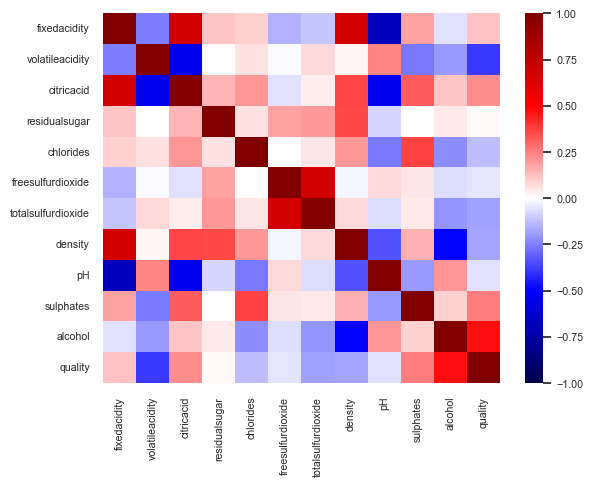

In [57]:
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic')

---
# 8. Discussion and Conclusion
It appears that wine quality is challenging to reliably predict based on chemical measurements alone, which is perhaps why many wine enthusiasts are so captivated by it.  The basic linear regression performed at the start showed a very poor correlation between any one feature and wine quality.  A total of 9 different models were applied to this data set in search of a well-performing model.  Optimizations and hyperparameter tuning were applied to various models to achieve better performance.  

SVM and random forest performed the best, but had a poor score of 0.37 

I re-ran this entire Jupyter notebook on the white wine data set, which had more data points, and I obtained very similar results as to the red wine analysis described above.  I have not published the results, graphs, or conclusions of the white wine data set since the results were so similar to the red wine data set.

Since wine quality is judged by a panel of experts, there is an inherent human factor in it.  The relatively low score of the classifier may be an indicator that the 11 features provided could be enhanced by the collection of more features, or perhaps an indicator that wine tasting is somewhat subjective.

An idea for future study would be to retest multiple wines using the same panel of experts to confirm if the quality scores are consistent.  If they are consistent, this suggests that it may be possible to collect more features and create an enhanced model that is a better predictor of quality.  If they are not consistent, this could suggest that the quality scores from experts are unreliable and that wine quality is too subjective to be predicted by a supervised machine learning model.